In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv('/content/Spam Email Detection - spam.csv',encoding='latin1', names=['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'])
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,v1,v2,NaN,NaN,NaN,NaN,NaN
1,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,NaN,NaN
2,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,NaN,NaN
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,NaN,NaN
4,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6'],
      dtype='object')

In [ ]:
df = df[['v1', 'v2']]

In [ ]:
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})

In [ ]:
df = df.dropna(subset=['v1'])

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=42)

In [ ]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [ ]:
predictions = classifier.predict(X_test_vectorized)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2%}")
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))

Accuracy: 98.30%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       965
         1.0       0.99      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
 [[963   2]
 [ 17 133]]


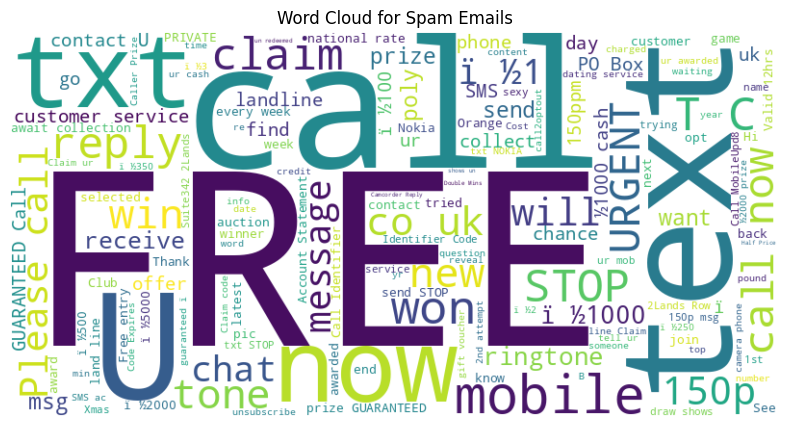

In [ ]:
spam_text = " ".join(df[df['v1'] == 1]['v2'])
wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')
plt.show()

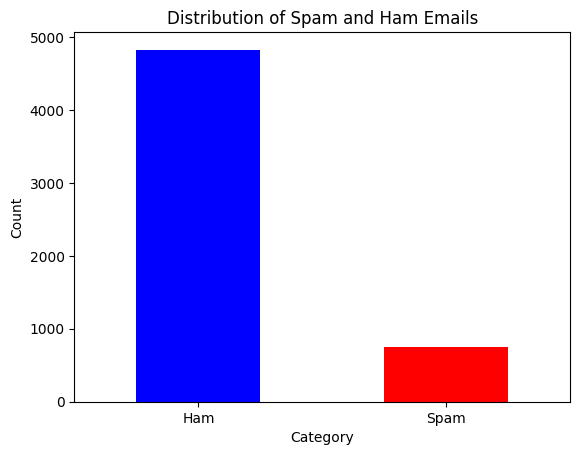

In [ ]:
df['v1'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'], rotation=0)
plt.show()